# Homework 2: Climate Change (not done yet)

TOC

<details>There have been many studies documenting that the average global temperature has been increasing over the last century. The consequences of a continued rise in global temperature will be dire. Rising sea levels and an increased frequency of extreme weather events will affect billions of people.  
  
In this problem, you will attempt to study the relationship between average global temperature and several other factors. The file climate_change_1.csv contains climate data from May 1983 to December 2008. The available variables include:
    
`Year`: the observation year.  

`Month`: the observation month.   

`Temp`: the difference in degrees Celsius between the average global temperature in that period and a reference value. This data comes from the [Climatic Research Unit at the University of East Anglia](https://crudata.uea.ac.uk/cru/data/temperature/) .  
`CO2`, `N2O`, `CH4`, `CFC.11`, `CFC.12`: atmospheric concentrations of carbon dioxide ($CO_2$), nitrous oxide ($N_2O$), methane ($CH_4$), trichlorofluoromethane ($CCl_3F$commonly referred to as $CFC-11$) and dichlorodifluoromethane ($CCl_2F_2$; commonly referred to as $CFC-12$), respectively. This data comes from the [ESRL/NOAA Global Monitoring Division](http://www.esrl.noaa.gov/gmd/ccgg/data-products.html).  

`CO2`, `N2O` and `CH4` are expressed in ppmv (parts per million by volume -- i.e., *397 ppmv of CO2 means that CO2 constitutes 397 millionths of the total volume of the atmosphere*)  

`CFC.11` and `CFC.12` are expressed in ppbv (parts per billion by volume).   
`Aerosols`: the mean stratospheric aerosol optical depth at 550 nm. This variable is linked to volcanoes, as volcanic eruptions result in new particles being added to the atmosphere, which affect how much of the sun's energy is reflected back into space. This data is from the [Godard Institute for Space Studies at NASA](https://data.giss.nasa.gov/modelforce/strataer/).  

`TSI`: the total solar irradiance (TSI) in W/m2 (the rate at which the sun's energy is deposited per unit area). Due to sunspots and other solar phenomena, the amount of energy that is given off by the sun varies substantially with time. This data is from the [SOLARIS-HEPPA project website](https://solarisheppa.geomar.de/solarisheppa/cmip5).  

`MEI`: multivariate El Nino Southern Oscillation index (MEI), a measure of the strength of the [El Nino/La Nina-Southern Oscillation](http://en.wikipedia.org/wiki/El_nino) (a weather effect in the Pacific Ocean that affects global temperatures). This data comes from the [ESRL/NOAA Physical Sciences Division](http://www.esrl.noaa.gov/psd/enso/mei/table.html).</details>

___

## Preparation

### Import data

In [1]:
import pandas as pd
df1 = pd.read_csv('../data/climate_change_1.csv')
df2 = pd.read_csv('../data/climate_change_2.csv')

### Exploration and cleaning

#### Data structure

In [2]:
df1.head().round()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,3.0,346.0,1639.0,304.0,191.0,350.0,1366.0,0.0,0.0
1,1983,6,2.0,346.0,1634.0,304.0,192.0,352.0,1366.0,0.0,0.0
2,1983,7,2.0,344.0,1633.0,304.0,193.0,354.0,1366.0,0.0,0.0
3,1983,8,1.0,342.0,1631.0,304.0,194.0,356.0,1366.0,0.0,0.0
4,1983,9,0.0,340.0,1648.0,304.0,194.0,357.0,1366.0,0.0,0.0


In [3]:
df2.head().round(2)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,NO,Temp
0,1983,5,2.56,345.96,1638.59,303.68,191.32,350.11,1366.10,0.09,2.64,0.11
1,1983,6,2.17,345.52,1633.71,303.75,192.06,351.85,1366.12,0.08,2.63,0.12
2,1983,7,1.74,344.15,1633.22,303.80,192.82,353.72,1366.28,0.07,2.63,0.14
3,1983,8,1.13,342.25,1631.35,303.84,193.60,355.63,1366.42,0.07,2.63,0.18
4,1983,9,0.43,340.17,1648.40,303.90,194.39,357.46,1366.23,0.06,2.65,0.15


#### Statistics

The most significant difference is the variable `NO`. Then explore **basic statistics** with round three:

In [4]:
df1.describe().round(3)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000,308.000,308.000,308.000,308.000,308.000,308.000,308.000,308.000,308.000,308.000
mean,1995.662,6.552,0.276,363.227,1749.825,312.392,251.973,497.525,1366.071,0.017,0.257
std,7.423,3.447,0.938,12.647,46.052,5.225,20.232,57.827,0.400,0.029,0.179
min,1983.000,1.000,-1.635,340.170,1629.890,303.677,191.324,350.113,1365.426,0.002,-0.282
25%,1989.000,4.000,-0.399,353.020,1722.182,308.112,246.296,472.411,1365.717,0.003,0.122
50%,1996.000,7.000,0.238,361.735,1764.040,311.507,258.344,528.356,1365.981,0.006,0.248
75%,2002.000,10.000,0.830,373.455,1786.885,316.979,267.031,540.524,1366.363,0.013,0.407
max,2008.000,12.000,3.001,388.500,1814.180,322.182,271.494,543.813,1367.316,0.149,0.739


In [5]:
df2.describe().round(3)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,NO,Temp
count,308.000,308.000,308.000,308.000,308.000,308.000,308.000,308.000,308.000,308.000,308.000,308.000
mean,1995.662,6.552,0.276,363.227,1749.825,312.392,251.973,497.525,1366.071,0.017,2.750,0.257
std,7.423,3.447,0.938,12.647,46.052,5.225,20.232,57.827,0.400,0.029,0.046,0.179
min,1983.000,1.000,-1.635,340.170,1629.890,303.677,191.324,350.113,1365.426,0.002,2.630,-0.282
25%,1989.000,4.000,-0.399,353.020,1722.182,308.112,246.296,472.411,1365.717,0.003,2.722,0.122
50%,1996.000,7.000,0.238,361.735,1764.040,311.507,258.344,528.356,1365.981,0.006,2.764,0.248
75%,2002.000,10.000,0.830,373.455,1786.885,316.979,267.031,540.524,1366.363,0.013,2.787,0.407
max,2008.000,12.000,3.001,388.500,1814.180,322.182,271.494,543.813,1367.316,0.149,2.814,0.739


#### Missing data

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
Year        308 non-null int64
Month       308 non-null int64
MEI         308 non-null float64
CO2         308 non-null float64
CH4         308 non-null float64
N2O         308 non-null float64
CFC-11      308 non-null float64
CFC-12      308 non-null float64
TSI         308 non-null float64
Aerosols    308 non-null float64
Temp        308 non-null float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
Year        308 non-null int64
Month       308 non-null int64
MEI         308 non-null float64
CO2         308 non-null float64
CH4         308 non-null float64
N2O         308 non-null float64
CFC-11      308 non-null float64
CFC-12      308 non-null float64
TSI         308 non-null float64
Aerosols    308 non-null float64
NO          308 non-null float64
Temp        308 non-null float64
dtypes: float64(10), int64(2)
memory usage: 29.0 KB


No missing data were found, then continue.

#### Duplication

In [8]:
print('Duplicated rows:', len(df1[df1.duplicated()]), ', then continue.')

Duplicated rows: 0 , then continue.


#### Outliers

Conduct a boxploting to find out outliers in DF1 and DF2:

In [9]:
import sys
import seaborn as sns
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(12,8), dpi=96)
for i in range(1, len(df1.columns) + 1):
    fig1.add_subplot(3, 4, i)
    df1.iloc[:, [i-1]].boxplot()

In [10]:
range(1, len(df2.columns) + 1)

range(1, 13)

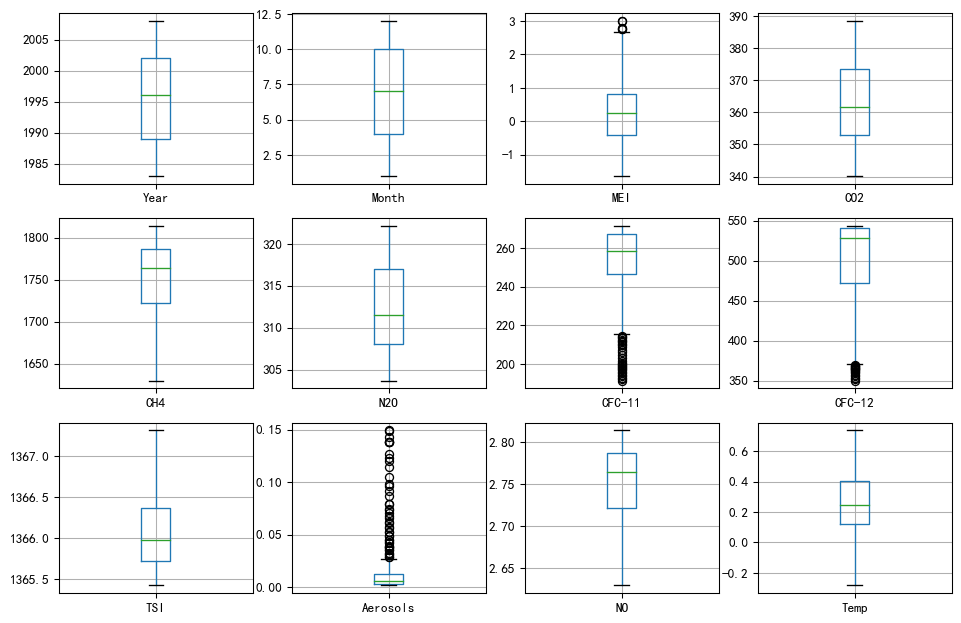

In [11]:
fig2 = plt.figure(figsize=(12,8), dpi=96)
for i in range(1, len(df2.columns) + 1):
    fig2.add_subplot(3, 4, i)
    df2.iloc[:, [i-1]].boxplot()

Check outliers:

In [12]:
import ipywidgets as widgets
z_slider = widgets.FloatSlider(
    value=2.9,
    min=2,
    max=3.5,
    step=0.1,
    description='Threshold:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
z_slider

FloatSlider(value=2.9, description='Threshold:', max=3.5, min=2.0, readout_format='.1f')

In [13]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df1['MEI']))
outlier_index = np.where(z > z_slider.value)[0]
print('Threshhold:', z_slider.value)
print('Index:', outlier_index)
print('Outlier:', [df1['MEI'][i] for i in outlier_index])

Threshhold: 2.9
Index: [171 172]
Outlier: [3.0010000000000003, 3.0]


Since rare outliers, ignore at preparation step and continue.

#### Correlation

Find and plot highly correlated variables (r>0.6 in df1, plotting r>0.5):

In [14]:
corr = df1.corr()
high_corr = corr[np.abs(corr) > 0.5].fillna(0)
corr[np.abs(corr) > 0.6].fillna('')

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1,,,0.985379,0.910563,0.99485,,0.870067,,,0.755731
Month,,1,,,,,,,,,
MEI,,,1,,,,,,,,
CO2,0.985379,,,1,0.872253,0.981135,,0.82321,,,0.748505
CH4,0.910563,,,0.872253,1,0.894409,0.713504,0.958237,,,0.699697
N2O,0.99485,,,0.981135,0.894409,1,,0.839295,,,0.743242
CFC-11,,,,,0.713504,,1,0.831381,,,
CFC-12,0.870067,,,0.82321,0.958237,0.839295,0.831381,1,,,0.688944
TSI,,,,,,,,,1,,
Aerosols,,,,,,,,,,1,


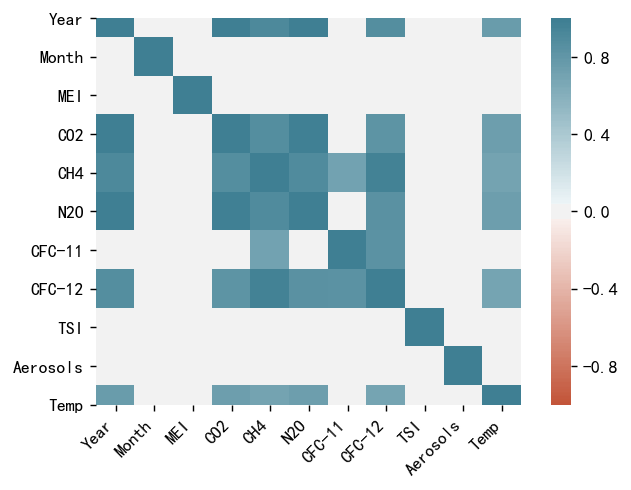

In [15]:
plt.figure(dpi=128)
ax = sns.heatmap(
    high_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Similarly, correlation in df1:

In [16]:
corr = df2.corr()
high_corr = corr[np.abs(corr) > 0.5].fillna(0)
corr[np.abs(corr) > 0.6].fillna('')

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,NO,Temp
Year,1,,,0.985379,0.910563,0.99485,,0.870067,,,0.910563,0.755731
Month,,1,,,,,,,,,,
MEI,,,1,,,,,,,,,
CO2,0.985379,,,1,0.872253,0.981135,,0.82321,,,0.872253,0.748505
CH4,0.910563,,,0.872253,1,0.894409,0.713504,0.958237,,,1,0.699697
N2O,0.99485,,,0.981135,0.894409,1,,0.839295,,,0.894409,0.743242
CFC-11,,,,,0.713504,,1,0.831381,,,0.713504,
CFC-12,0.870067,,,0.82321,0.958237,0.839295,0.831381,1,,,0.958237,0.688944
TSI,,,,,,,,,1,,,
Aerosols,,,,,,,,,,1,,


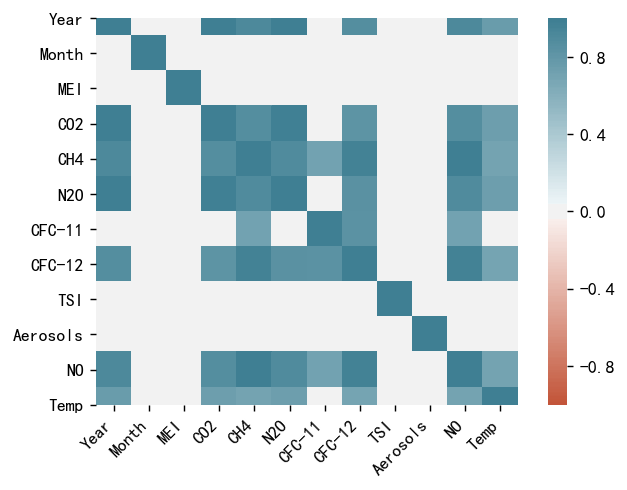

In [17]:
plt.figure(dpi=128)
ax = sns.heatmap(
    high_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**Potential redundant variables found**, however, now the data is prepared for analyzing.

____

## Problem 1 — First Model
*We are interested in how changes in these variables affect future temperatures, as well as how well these variables explain temperature changes so far. To do this, first read the dataset climate_change_1.csv into Python or Matlab*.  
  
*Then, split the data into a training set, consisting of all the observations up to and including 2006, and a testing set consisting of the remaining years. A training set refers to the data that will be used to build the model, and a testing set refers to the data we will use to test our predictive ability*.  
  
*After seeing the problem, your classmate Alice immediately argues that we can apply a linear regression model. Though being a little doubtful, you decide to have a try. To solve the linear regression problem, you recall the linear regression has a closed form solution*:  
$$\theta = (X^TX)^{-1}X^TY$$

### Read and split

Though data have been prepared in section *Data Preparation*, dataset df1 has been imported again here following problem description.

**Read the dataset**:

In [18]:
# loaded in exploration

# import pandas as pd
# df1 = pd.read_csv('../data/climate_change_1.csv').iloc[:,2:]

**Split into training set and testing set**:

In [19]:
# Df1 trainset
df1_train = df1[df1['Year']<=2006].iloc[:,2:]
# Check the result
df1_train.iloc[[0, 1,-2, -1],:]

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
282,1.292,380.18,1791.91,320.321,248.605,539.500,1365.7039,0.0049,0.440
283,0.951,381.79,1795.04,320.451,248.480,539.377,1365.7087,0.0054,0.518


In [20]:
# Df1 testet
df1_test = df1[df1['Year']>2006].iloc[:,2:]
# Check the result
df1_test.iloc[[0, 1,-2, -1],:]

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
284,0.974,382.93,1799.66,320.561,248.372,539.206,1365.7173,0.0054,0.601
285,0.510,383.81,1803.08,320.571,248.264,538.973,1365.7145,0.0051,0.498
306,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394
307,-0.666,385.56,1812.88,322.182,244.204,535.005,1365.6926,0.0046,0.330


### 1. Closed form function
*Implement a function `closed_form_1` that computes this closed form solution given the features X, labels y (using Python or Matlab).*

Given a pandas `Dataframe`, the features X is the dataframe excluding taget y, then:

In [109]:
import numpy as np  # matrix, vector, and linear algebra support
from numpy.linalg import inv  # matrix inversion


def closed_form_1(X: np.ndarray, y: np.ndarray) -> np.matrix:
    """
    To calculate OLS theta(s) given X, y in ndarrays.

    Parameters: 
    ----------
        X: features, IV.
        y: taget variable, DV.
    Return:
    ----------
        theta: coefficients
    """

    X = np.column_stack((np.ones(len(X)), X))  # add x0 = 1 to matrix X
    theta = inv(X.T @ X) @ X.T @ y
    #theta = theta[1:].reshape((1,10))
    return theta


def closed_form_df(df: pd.core.frame.DataFrame, column: int = 8) -> np.matrix:
    """
    To calculate OLS theta(s) given data in a DataFrame.
    
    Parameters: 
    ----------
        df: a DataFrame of data including both IV X and DV y.
        column = 8: index number of clomn where DV y lies. The default value is 8.
    
    Return:
    ----------
        theta: coefficients
    """

    X = df.drop(df.columns[column], axis=1).to_numpy()  # X: the features
    X = np.column_stack((np.ones(len(X)), X))  # add x0 = 1 to matrix X
    y = df.iloc[:, [column]].to_numpy(
    )  # y: the results, lower case to emphasize the difference
    theta = inv(X.T @ X) @ X.T @ y
    #theta = theta[1:].reshape((1,10))
    return theta

Test `closed_form_1` and `closed_form_df` on df1:

In [110]:
df1_train.drop(df1_train.columns[8], axis=1)

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619
...,...,...,...,...,...,...,...,...
279,0.759,380.45,1762.66,319.930,248.981,539.682,1365.7067,0.0041
280,0.793,378.92,1776.04,320.010,248.775,539.566,1365.8419,0.0043
281,0.892,379.16,1789.02,320.125,248.666,539.488,1365.8270,0.0044
282,1.292,380.18,1791.91,320.321,248.605,539.500,1365.7039,0.0049


In [111]:
# Given X, and y in numpy arrays
X = df1_train.drop(df1_train.columns[8], axis=1).to_numpy() # X: the features
y = df1_train.iloc[:, [8]].to_numpy()                       # y: the results, lower case to emphasize the difference
X_test = df1_test.drop(df1_train.columns[8], axis=1).to_numpy()
y_test = df1_test.iloc[:, [8]].to_numpy()
theta = closed_form_1(X, y)
theta

array([[-1.24594260e+02],
       [ 6.42053134e-02],
       [ 6.45735927e-03],
       [ 1.24041896e-04],
       [-1.65280032e-02],
       [-6.63048889e-03],
       [ 3.80810324e-03],
       [ 9.31410835e-02],
       [-1.53761324e+00]])

In [112]:
# Given a DataFrame
theta = closed_form_df(df1_train).reshape((1,9))
theta

[[1.0000000e+00 2.5560000e+00 3.4596000e+02 ... 3.5011300e+02
  1.3661024e+03 8.6300000e-02]
 [1.0000000e+00 2.1670000e+00 3.4552000e+02 ... 3.5184800e+02
  1.3661208e+03 7.9400000e-02]
 [1.0000000e+00 1.7410000e+00 3.4415000e+02 ... 3.5372500e+02
  1.3662850e+03 7.3100000e-02]
 ...
 [1.0000000e+00 8.9200000e-01 3.7916000e+02 ... 5.3948800e+02
  1.3658270e+03 4.4000000e-03]
 [1.0000000e+00 1.2920000e+00 3.8018000e+02 ... 5.3950000e+02
  1.3657039e+03 4.9000000e-03]
 [1.0000000e+00 9.5100000e-01 3.8179000e+02 ... 5.3937700e+02
  1.3657087e+03 5.4000000e-03]]


array([[-1.24594260e+02,  6.42053134e-02,  6.45735927e-03,
         1.24041896e-04, -1.65280032e-02, -6.63048889e-03,
         3.80810324e-03,  9.31410835e-02, -1.53761324e+00]])

Using *scipy* to check the result:

In [113]:
from sklearn.linear_model import LinearRegression as lm
l=lm().fit(X, y)
l.coef_

array([[ 6.42053134e-02,  6.45735927e-03,  1.24041896e-04,
        -1.65280033e-02, -6.63048889e-03,  3.80810324e-03,
         9.31410835e-02, -1.53761324e+00]])

Works fine (some differences due to SVD used in *sklearn.LinearRegression*).

### 2. Fomula and R squre
*Write down the mathematical formula for the linear model and evaluate the model R squre on the training set and the testing set.*

In [26]:
df1_train.columns

Index(['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols',
       'Temp'],
      dtype='object')

**Formula of this model**(`round(5)`)
$$\hat{Temp}=-124.594+0.06421*MEI +0.00646*CO_2+0.00012*CH_4-0.01653*N_2O-0.00663*CFC11+0.00381*CFC12+0.09314*TSI-1.53761*Aerosols$$  
  
**Formula of R-squred**  
R-squared measures model fitting and can be calculated as:
$$R^2 = \frac{var(X\hat{\beta})}{var(y)} = \frac{\sum_{i=1}^{n}(\hat{y}_i-\bar{y})^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}$$ 

In [129]:
def predict(X: np.ndarray, theta: np.ndarray) -> np.ndarray:
    """
    To predict y given X and theta.
    
    Parameters: 
    ----------

        X: features, IV.
        theta: coefficients.
    
    Return:
    ----------
        y_hat: predicted value.
    """

    X = np.column_stack((np.ones(len(X)), X))  # add x0 = 1 to matrix X
    theta = theta.reshape((1, len(theta)))
    y_hat = np.sum(X * theta, axis=1)
    return (y_hat)


Define a `score` function to calculate $R^2$:

In [130]:
def score(y: np.ndarray, y_hat: np.ndarray) -> float:
    """
    To calculate OLS R^2 given data in ndarrays.
    
    Parameters: 
    ----------
        y: actual labels.
        y_hat: predicted values.
    
    Return:
    ----------
        SST: R^2 caculated based on y and y_hat.
    """

    mean = y.mean()
    TSS = np.sum(np.square(y_hat - mean))
    ESS = np.sum(np.square(y - mean))
    SST = TSS / ESS
    return SST

On training set:

In [131]:
X = df1_train.drop(df1_train.columns[8], axis=1).to_numpy()
y = df1_train.iloc[:, [8]].to_numpy()
rsquare_train = score(y, predict(X, closed_form_1(X, y)))
print("R2:", rsquare_train)

# Use *scipy* to check the result:
l=lm().fit(X, y)
print("R2 by scipy:", l.score(X, y))

R2: 0.7508932770388234
R2 by scipy: 0.7508932770523428


On testing set:

In [132]:
rsquare_test = score(y_test, predict(X_test, closed_form_1(X, y)))
print("R2:", rsquare_test)

R2: 0.22517701916248536


Works fine.

**Evaluation**

Based on the formula above, R-squred can be applied in Python to evaluate previous model. On training set: $R^2$ is 0.75089, while on testing set, $R^2$ is 0.22518.   
  
\*\*\* *However, for a multi-variable linear model, $R^{2}_{adjusted}$ may be a better indicator because the original $R^{2}$ is sensitive to the number of features.*

### 3. Significant variables
*Which variables are significant in the model?*

In [133]:
import statsmodels.api as sm

# set an alpha
alpha = 0.05

X2 = sm.add_constant(X)
l = sm.OLS(y, X2).fit()
pvalues = l.summary2().tables[1]['P>|t|']
labels =  ['x0: constant'] + ["x" + str(i+1) + ": " + df1_train.columns[i] for i in range(len(df1_train.columns)-1)]
variables = pd.DataFrame(np.concatenate([pd.DataFrame(labels), pd.DataFrame(pvalues)], axis=1))
variables.columns = ['Variable', 'pvalues']

# print significant variables
variables[variables.pvalues < alpha]

,Variable,pvalues
0,x0: constant,1.43105e-09
1,x1: MEI,4.89889e-20
2,x2: CO2,0.00505252
5,x5: CFC-11,5.95729e-05
6,x6: CFC-12,0.00020972
7,x7: TSI,1.09594e-09
8,x8: Aerosols,5.41127e-12


That's to say, significant(alpha=0.05) varibles are:

In [134]:
[i for i in variables[variables.pvalues < alpha].Variable.to_numpy()]

['x0: constant',
 'x1: MEI',
 'x2: CO2',
 'x5: CFC-11',
 'x6: CFC-12',
 'x7: TSI',
 'x8: Aerosols']

### 4. Necessary conditions and application
*Write down the necessary conditions for using the closed form solution. And you can apply it to the dataset climate_change_2.csv, explain the solution is unreasonable.*

**Necessary conditions**  
$X^TX$ must be invertible.

In [135]:
df2.head(2)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,NO,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,2.63859,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,2.63371,0.118


In [136]:
# Df2 trainset
df2_train = df2[df2['Year']<=2006].iloc[:,2:]
# Check the result
df2_train.iloc[[0, 1,-2, -1],:]

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,NO,Temp
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,2.63859,0.109
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,2.63371,0.118
282,1.292,380.18,1791.91,320.321,248.605,539.500,1365.7039,0.0049,2.79191,0.440
283,0.951,381.79,1795.04,320.451,248.480,539.377,1365.7087,0.0054,2.79504,0.518


In [137]:
# Df2 testet
df2_test = df2[df2['Year']>2006].iloc[:,2:]
# Check the result
df2_test.iloc[[0, 1,-2, -1],:]

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,NO,Temp
284,0.974,382.93,1799.66,320.561,248.372,539.206,1365.7173,0.0054,2.79966,0.601
285,0.510,383.81,1803.08,320.571,248.264,538.973,1365.7145,0.0051,2.80308,0.498
306,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,2.81237,0.394
307,-0.666,385.56,1812.88,322.182,244.204,535.005,1365.6926,0.0046,2.81288,0.330


In [138]:
# Given X, and y in numpy arrays
X_2 = df2_train.drop(df2_train.columns[9], axis=1).to_numpy() # X: the features
y_2 = df2_train.iloc[:, [9]].to_numpy()                       # y: the results, lower case to emphasize the difference
X_2_test = df2_test.drop(df2_test.columns[9], axis=1).to_numpy()
y_2_test = df2_test.iloc[:, [9]].to_numpy()
theta = closed_form_1(X_2, y_2)
theta

array([[-1.18459383e+02],
       [ 6.41762745e-02],
       [ 6.48209178e-03],
       [ 6.24389931e-03],
       [-1.65280032e-02],
       [-6.63048889e-03],
       [ 3.80810324e-03],
       [ 9.31410835e-02],
       [-1.53761324e+00],
       [-6.12593018e+00]])

**Why unreasonable:**  
Because $X^TX$ is  non-invertible.  
  
According to [Andrew NG](https://www.coursera.org/learn/machine-learning/supplement/66bi5/normal-equation-noninvertibility), 
>When implementing the normal equation in octave we want to use the `pinv` function rather than `inv`. The 'pinv' function will give you a value of \thetaθ even if $X^TX$ is not invertible.  
>If $X^TX$ is noninvertible, the common causes might be having :
> - **Redundant features**, where two features are very closely related (i.e. they are linearly dependent)
> - **Too many features** (e.g. m ≤ n). In this case, delete some features or use "regularization" (to be explained in a later lesson).  
>
>Solutions to the above problems include deleting a feature that is linearly dependent with another or deleting one or more features when there are too many features.
  
In this case, many variables (as mentioned in the first section exploration) are highly correlated.

___

## Problem 2 — Regularization
*Regularization is a method to boost robustness of model, including L1 regularization and L_2 regularization.*

### 1. Loss function
*Please write down the loss function for linear model with L1 regularization, L2
regularization, respectively.*

**L1， Lasso Regression:**
$$J\left( \theta  \right)=\frac{1}{2m}[\sum\limits_{i=1}^{m}{{{({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})}^{2}}+\lambda \sum\limits_{j=1}^{n}{|\theta _{j}|}]}$$

**L2， Ridge Regression:**
$$J\left( \theta  \right)=\frac{1}{2m}[\sum\limits_{i=1}^{m}{{{({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})}^{2}}+\lambda \sum\limits_{j=1}^{n}{\theta _{j}^{2}}]}$$

### 2. Compute and regularization
*The closed form solution for linear model with L2 regularization:*
$$𝛉 = (𝐗^𝐓𝐗 + 𝛌𝐈)^{−𝟏}𝐗^𝐓𝐘$$
*where I is the identity matrix. 
Write a function closed_form_2 that computes this
closed form solution given the features X, labels Y and the regularization
parameter λ (using Python or Matlab).*

In [139]:
def closed_form_2(X: np.ndarray, y: np.ndarray, lambd: float) -> np.ndarray:
    """
    To calculate OLS theta(s) given X, y in ndarrays.

    Parameters: 
    ----------
        X: features, IV.
        y: taget variable, DV.
        lambd: regularization parameter
    Return:
    ----------
        theta: coefficients
    """

    X = np.concatenate([np.ones((len(X), 1)), X], axis=1)  # add x0 = 1 to matrix X
    I = np.identity(len(X[0]))
    theta = inv(X.T @ X + lambd * I) @ (X.T @ y)
    return theta

In [140]:
len(X[0])

8

### 3. Comparison
*Compare the two solutions in problem 1 and problem 2 and explain the reason why linear model with L2 regularization is robust. (using climate_change_1.csv)*

In [141]:
X_train = df1_train.drop(df1_train.columns[8], axis=1).to_numpy()
y_train = df1_train.iloc[:, [8]].to_numpy()
theta_0 = closed_form_1(X_train, y_train)
theta_0

array([[-1.24594260e+02],
       [ 6.42053134e-02],
       [ 6.45735927e-03],
       [ 1.24041896e-04],
       [-1.65280032e-02],
       [-6.63048889e-03],
       [ 3.80810324e-03],
       [ 9.31410835e-02],
       [-1.53761324e+00]])

In [142]:
theta_2 = closed_form_2(X_train, y_train, 0.5)
theta_2

array([[-4.68953239e-03],
       [ 4.55768014e-02],
       [ 7.80443532e-03],
       [ 1.95701031e-04],
       [-1.64893727e-02],
       [-6.38359095e-03],
       [ 3.74766007e-03],
       [ 1.44919104e-03],
       [-3.65599605e-01]])

In [143]:
rsquare_test_theta_0 = score(y_test, predict(X_test, theta_0))
rsquare_test_theta_2 = score(y_test, predict(X_test, theta_2))
print("R2:", rsquare_test_theta_0, rsquare_test_theta_2)

R2: 0.22517701916248536 0.8022366128860412


Obviously, theta_2, which is the result of ridge regression, is much better due to the lower effect of redundant variables.

### 4. Change λ
*You can change the regularization parameter λ to get different solutions for this problem. Suppose we set λ = 10, 1, 0.1, 0.01, 0.001, and please evaluate the model*  $R^2$ *on the training set and the testing set.*

In [144]:
from sklearn.metrics import mean_squared_error as mse

# Define constants
X_train = df1_train.drop(df1_train.columns[8], axis=1).to_numpy()
y_train = df1_train.iloc[:, [8]].to_numpy()
X_test = df1_test.drop(df1_test.columns[8], axis=1).to_numpy()
y_test = df1_test.iloc[:, [8]].to_numpy()
lambds = [10.00, 1.000, 0.10, 0.01, 0.001]

print("R scores comparison")
# print("λ　　　　　　Training R2　　　　　　Testing R2 　　　　　　Testing MSE")
print("λ　　　　　　Training R2　　　　　　Testing R2")
for lambd in lambds:
    theta = closed_form_2(X_train, y_train, lambd)
    rsquare_train = score(y_train, predict(X_train, theta))
    rsquare_test = score(y_test, predict(X_test, theta))
    # meanse = mse(y_test, predict(X_test, theta))
    # print(lambd, "　　　　", rsquare_train.round(5), "　　　　　　　", rsquare_test.round(5), "　　　　　　　", meanse.round(5))
    print(lambd, "　　　　", rsquare_train.round(5), "　　　　　　　", rsquare_test.round(5))

R scores comparison
λ　　　　　　Training R2　　　　　　Testing R2
10.0 　　　　 0.67461 　　　　　　　 0.94087
1.0 　　　　 0.67947 　　　　　　　 0.84675
0.1 　　　　 0.69447 　　　　　　　 0.67329
0.01 　　　　 0.71165 　　　　　　　 0.58528
0.001 　　　　 0.71483 　　　　　　　 0.56252


*Finally, please decide the best regularization parameter λ. (Note that: As a qualified data analyst, you must know how to choose model parameters, please learn about cross validation methods.)*

In [145]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

def cross_validation(X, y):
    """
    Using k-fold to get optimal value of lambda based on R-squared.

    Parameters: 
    ----------
        X: features, IV.
        y: taget variable, DV.
    Return:
    ----------
        alpha: learning rate
    """
    kfold = KFold(n_splits=10).split(X, y)
    model = Ridge(normalize=True)  # Normalization returns better result
    lambdas = [10, 1, 0.1, 0.01, 0.001]
    grid_param = {"alpha": lambdas}
    grid = GridSearchCV(estimator=model,
                        param_grid=grid_param,
                        cv=kfold,
                        scoring="r2")
    grid.fit(X, y)
    alpha = grid.best_params_['alpha']
    return alpha


print('Optimal lamba should be ', cross_validation(X_train, y_train))

Optimal lamba should be  0.1


C:\Users\oyrx\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


___

## Problem 3 — Feature Selection

### 1. Lesser variables
*From Problem 1, you can know which variables are significant, therefore you can use less variables to train model. For example, remove highly correlated and redundant features. You can propose a workflow to select feature.*

As mentioned in the first section and known siginificant variables(MEI, CO2, CDC-11, CDC-12, TST, Aerocols), a new correlation matrix can be introduced:


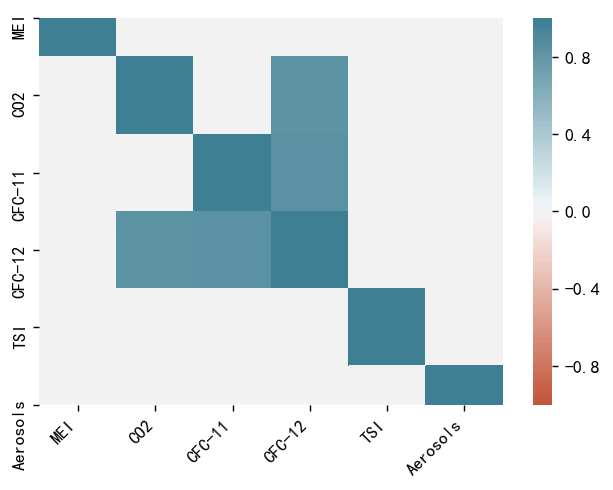

In [146]:
corr = df1[['MEI', 'CO2', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols' ]].corr()
high_corr = corr[np.abs(corr) > 0.5].fillna(0)
corr[np.abs(corr) > 0.6].fillna('')
plt.figure(dpi=128)
ax = sns.heatmap(
    high_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Thus, CFC-12 should also be removed(r>0.6) then we have:

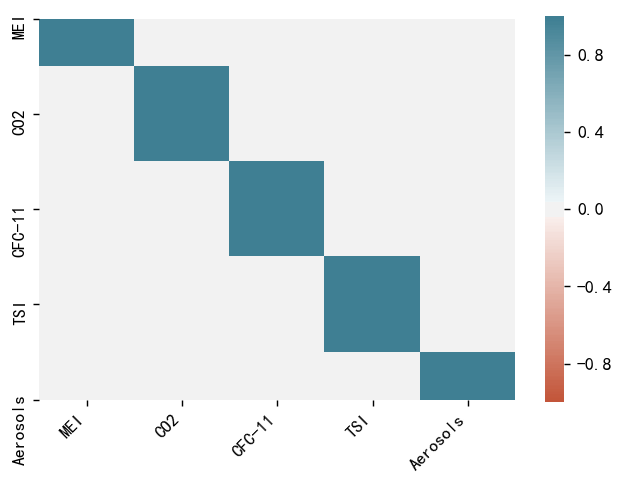

In [147]:
corr = df1[['MEI', 'CO2', 'CFC-11', 'TSI', 'Aerosols' ]].corr()
high_corr = corr[np.abs(corr) > 0.5].fillna(0)
corr[np.abs(corr) > 0.6].fillna('')
plt.figure(dpi=128)
ax = sns.heatmap(
    high_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Now no redundant variables left.

### 2. A better model
*Train a better model than the model in Problem 2.*

In [148]:
X_lesser = df1_train[['MEI', 'CO2', 'CFC-11', 'TSI', 'Aerosols' ]].to_numpy() # X: the features
y_lesser = df1_train.iloc[:, [8]].to_numpy()                                  # y: the results, lower case to emphasize the difference
X_test = df1_test[['MEI', 'CO2', 'CFC-11', 'TSI', 'Aerosols' ]].to_numpy()
y_test = df1_test.iloc[:, [8]].to_numpy()

#theta_lesser = closed_form_1(X_lesser, y_lesser)
theta_lesser = closed_form_2(X_lesser, y_train, cross_validation(X_lesser,y_lesser))
theta_lesser = np.array(theta_lesser)
formula = [str(theta_lesser.round(5).tolist()[i][0]) + ' * x' + str(i) + ' + ' for i in range(0, len(theta_lesser.round(5).tolist()))]
print('Thus our better model is: \n\ny = '+ ' '.join(formula).replace(' * x0', '')[:-3])

Thus our better model is: 

y = -0.02465 +  0.04909 * x1 +  0.0118 * x2 +  2e-05 * x3 +  -0.00293 * x4 +  -0.88807 * x5


C:\Users\oyrx\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Significance:

In [149]:
l = sm.OLS(y_lesser, X_lesser).fit()
pvalues = l.summary2().tables[1]['P>|t|']
pvalues<0.05

x1     True
x2     True
x3    False
x4     True
x5     True
Name: P>|t|, dtype: bool

Then remove x3 based on the new result:

In [154]:
X_lesser = df1_train[['MEI', 'CO2', 'TSI', 'Aerosols' ]].to_numpy() # X: the features
y_lesser = df1_train.iloc[:, [8]].to_numpy()                                  # y: the results, lower case to emphasize the difference
X_test = df1_test[['MEI', 'CO2', 'TSI', 'Aerosols' ]].to_numpy()
y_test = df1_test.iloc[:, [8]].to_numpy()

theta_lesser = closed_form_1(X_lesser, y_train)
theta_lesser = np.array(theta_lesser)
formula = [str(theta_lesser.round(5).tolist()[i][0]) + ' * x' + str(i) + ' + ' for i in range(0, len(theta_lesser.round(5).tolist()))]
print('Thus our better model is: \n\ny = '+ ' '.join(formula).replace(' * x0', '')[:-3])

Thus our better model is: 

y = -118.60162 +  0.06204 * x1 +  0.01069 * x2 +  0.08418 * x3 +  -1.58444 * x4


In [155]:
l = sm.OLS(y_lesser, X_lesser).fit()
pvalues = l.summary2().tables[1]['P>|t|']
pvalues<0.05

x1    True
x2    True
x3    True
x4    True
Name: P>|t|, dtype: bool

R2:

In [156]:
rsquare_train = score(y_lesser, predict(X_lesser, theta_lesser))
rsquare_test = score(y_test, predict(X_test, theta_lesser))
print(('R2\nTraining: {}\nTesting: {}').format(rsquare_train, rsquare_test))

R2
Training: 0.7336403428986277
Testing: 0.6328867941215359


___

## Problem 4 — Gradient Descent
*Gradient descent algorithm is an iterative process that takes us to the minimum of a function. Please write down the iterative expression for updating the solution of linear model and implement it using Python or Matlab in gradientDescent function.*

### Define functions

In [157]:
def cost_function(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> float:
    """
    To calculate cost given X, y, and theta in ndarrays.

    Parameters: 
    ----------
        X: features, IV.
        y: taget variable, DV.
        theta: coefficients
    Return:
    ----------
        cost: calculated cost
    """
    cost = np.sum(np.power((X * theta.T) - y, 2)) / (2 * len(X))
    return cost


def gradientDescent(X: np.ndarray, y: np.ndarray, theta: np.ndarray,
                    alpha: float,  iters: float) -> np.matrix and np.ndarray:
    """
    To find theta given X, y, theta in ndarrays and alpha, iters in float.

    Parameters: 
    ----------
        X: features, IV.
        y: taget variable, DV.
        theta: coefficients
        alpha: learning rate
        iters: an assigned number of iterations
    Return:
    ----------
        theta: np.matrix, final theta
        cost: np.ndarray, calculated cost
    """

    temp = np.mat(np.zeros(theta.shape))
    cost = np.zeros(iters)
    thetaNums = int(theta.shape[1])

    for i in range(iters):
        error = (X * theta.T - y)
        for j in range(thetaNums):
            derivativeInner = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - (alpha * np.sum(derivativeInner) /
                                        len(X))
        theta = temp
        cost[i] = cost_function(X, y, theta)
    return theta, cost


### Define parameters

In [158]:
import matplotlib.pyplot as plt


theta = np.mat([0,0,0,0,0,0,0,0,0])
iters = 5000 # The number of iterations
alpha = 0.01 # Learning rate

X = df1.get(["MEI","CO2","CH4","N2O","CFC-11","CFC-12","TSI","Aerosols"])
X = np.column_stack((np.ones(len(X)),X))
X_train = X[:284]
X_test = X[284:]
X_train = np.mat(X_train)  

y = df1.get("Temp")
y_train = y[:284]
y_test = y[284:]

y_train = np.mat(y_train).T

for i in range(1,9):
    X_train[:,i] = (X_train[:,i] - min(X_train[:,i])) / (max(X_train[:,i]) - min(X_train[:,i]))

theta_n = (X_train.T*X_train).I*X_train.T*y_train
print("theta =",theta_n)

theta = [[-0.07698894]
 [ 0.29450977]
 [ 0.28935427]
 [ 0.02211171]
 [-0.27724073]
 [-0.53156629]
 [ 0.7376296 ]
 [ 0.17604596]
 [-0.22725924]]


### Find theta

In [159]:
finalTheta,cost = gradientDescent(X_train,y_train,theta,alpha,iters)

### Check the result

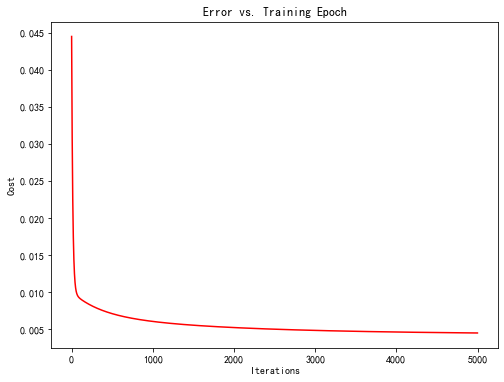

In [160]:
fig, bx = plt.subplots(figsize=(8,6))
bx.plot(np.arange(iters), cost, 'r') 
bx.set_xlabel('Iterations') 
bx.set_ylabel('Cost') 
bx.set_title('Error vs. Training Epoch') 
plt.show()

The result indicates that algorithm has converged and the final theta is 

In [161]:
print("Final theta ",finalTheta, 'with cost', cost)

Final theta  [[-0.07049773  0.19881777  0.19132161  0.06760065  0.18431036 -0.08700985
   0.08339899  0.1001724  -0.16872269]] with cost [0.0444738  0.04207593 0.0398436  ... 0.0044812  0.0044811  0.004481  ]
